# Clustering Online Retail Sales Data

Dataset: https://archive.ics.uci.edu/ml/datasets/online+retail

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, metrics, cluster

%matplotlib inline

Load data

In [2]:
df = pd.read_excel("/data/Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Find out if there are any nan in the columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.isna().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

Drop all records having nan CustomerId

In [5]:
df = df[~df.CustomerID.isna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


Find number of unique values for each column

In [6]:
df.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

Use describe to find range of each column

In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


We see quantity column has a large negative value. Probably negative values are not valid for this analysis. Drop the records having negative values in frequency. Verify that there is not more nagative values in the columns

In [8]:
df = df[df.Quantity>0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      397924 non-null object
StockCode      397924 non-null object
Description    397924 non-null object
Quantity       397924 non-null int64
InvoiceDate    397924 non-null datetime64[ns]
UnitPrice      397924 non-null float64
CustomerID     397924 non-null float64
Country        397924 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Convert the InvoiceDate to datetime.

In [11]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)

In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Create caculated field to computee TotalPrice 

In [13]:
df["TotalPrice"] = df.Quantity * df.UnitPrice
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


For calculating rececency, use max for InvoiceDate as point of reference. 

In [14]:
last_date = df.InvoiceDate.max()
last_date

Timestamp('2011-12-09 12:50:00')

Calculate the R-F-M.

In [15]:
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda values: (last_date - values.max()).days,
    "InvoiceNo" : lambda values: len(values),
    "TotalPrice": lambda values: np.sum(values)
})

rfm.head()


,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40


Rename the columns - "recency", "frequency", "monetary"

In [16]:
rfm.columns = ["recency", "frequency", "monetary"]
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40


Digitize the columns for R-F-M into 5 equal buckets. To achieve this, find percentile values as bucket boundaries. These will create 5 buckets of equal sizes.

In [17]:
quantiles = np.arange(1, 6) * 20
quantiles

array([ 20,  40,  60,  80, 100])

In [18]:
rfm["r_score"] = np.digitize(rfm.recency, bins = np.percentile(rfm.recency, quantiles)
                           , right=True)

rfm["m_score"] = np.digitize(rfm.monetary, bins = np.percentile(rfm.monetary, quantiles)
                           , right=True)

rfm["f_score"] = np.digitize(rfm.frequency, bins = np.percentile(rfm.frequency, quantiles)
                           , right=True)

rfm["r_score"] = 4 - rfm["r_score"]

rfm["r_score"] = rfm["r_score"] + 1
rfm["f_score"] = rfm["f_score"] + 1
rfm["m_score"] = rfm["m_score"] + 1


rfm.head()

,recency,frequency,monetary,r_score,m_score,f_score
CustomerID,,,,,,
12346.0,325,1,77183.60,1,5,1
12347.0,1,182,4310.00,5,5,5
12348.0,74,31,1797.24,2,4,3
12349.0,18,73,1757.55,4,4,4
12350.0,309,17,334.40,1,2,2


In [19]:
rfm.sample(10, random_state=123)

,recency,frequency,monetary,r_score,m_score,f_score
CustomerID,,,,,,
13037.0,137,48,881.07,2,3,3
15864.0,21,20,1936.32,4,4,2
13848.0,91,5,1255.00,2,4,1
15274.0,3,47,716.57,5,3,3
17865.0,30,370,10526.32,4,5,5
17398.0,114,38,653.38,2,3,3
12945.0,287,23,462.95,1,2,2
16737.0,52,1,417.60,3,2,1
14796.0,0,1141,8022.49,5,5,5


In [20]:
scaler = preprocessing.StandardScaler()
X = rfm[["r_score", "f_score", "m_score"]].values
X = scaler.fit_transform(X.astype("float32"))
X

array([[-1.4252185 , -1.3840666 ,  1.4140507 ],
       [ 1.4030564 ,  1.4140533 ,  1.4140507 ],
       [-0.7181498 ,  0.01499338,  0.70702535],
       ...,
       [ 1.4030564 , -1.3840666 , -1.4140507 ],
       [ 1.4030564 ,  1.4140533 ,  1.4140507 ],
       [-0.01108105,  0.7145233 ,  0.70702535]], dtype=float32)

Find what could be an optimal number of clusters using elbow plot. As we see in the plot below, we can use 5 or 6 number of clusters (K) for KMeans algorithm.

Text(0, 0.5, 'Inertia Score')

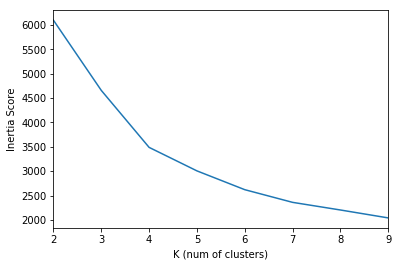

In [21]:
inertias = {}
for k in range(2, 10): 
    kmeans = cluster.KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)
    inertias[k] = kmeans.inertia_
    
pd.Series(inertias).plot()
plt.xlabel("K (num of clusters)")
plt.ylabel("Inertia Score")

In [22]:
k = 5
kmeans = cluster.KMeans(n_clusters=k, random_state = 1)
rfm["cluster"] = kmeans.fit_predict(X)

In [23]:
rfm.cluster.value_counts()

2    1163
1    1136
0     777
3     668
4     595
Name: cluster, dtype: int64

In [24]:
rfm["distance"] = 0.0
for i in range(k):
    centroid = kmeans.cluster_centers_[i].reshape(1, -1)
    cluster_points = X[rfm.cluster == i]
    rfm["distance"][rfm.cluster == i] = metrics.euclidean_distances(centroid, cluster_points).flatten()
rfm.sample(20)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,recency,frequency,monetary,r_score,m_score,f_score,cluster,distance
CustomerID,,,,,,,,
13591.0,64,58,1117.13,3,4,3,0,0.835705
13630.0,4,71,2031.78,5,4,4,2,0.763178
16658.0,367,8,123.24,1,1,1,1,0.692686
14346.0,120,60,1021.58,2,4,4,0,0.352840
17119.0,2,35,606.91,5,3,3,3,0.712960
14340.0,218,6,134.70,1,1,1,1,0.692686
14880.0,76,47,706.19,2,3,3,0,0.645417
15503.0,362,70,147.09,1,1,4,1,1.784894
13721.0,35,28,524.14,3,3,2,3,0.973406


In [25]:
rfm.groupby("cluster").distance.agg(["mean", "count"])

,mean,count
cluster,,
0,0.869923,777
1,0.755233,1136
2,0.705951,1163
3,0.835333,668
4,0.773771,595
